In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
df_eng = pd.read_csv('test_tutor_data.csv').drop(columns='Unnamed: 0')

In [9]:
df_eng.isnull().sum(axis=0)

descriptions                 26
hours_tutor                 724
rate                         24
bio                          24
num_ratings                 889
subjects_emph                 0
subjects_all                  0
edu                           0
hours_sun                   279
hours_mon                   279
hours_tues                  279
hours_wed                   279
hours_thurs                 279
hours_fri                   279
hours_sat                   279
hours_per_week_schedule     279
start_date                 2846
diff_weeks                 2846
hours_per_week_tutor       2846
dtype: int64

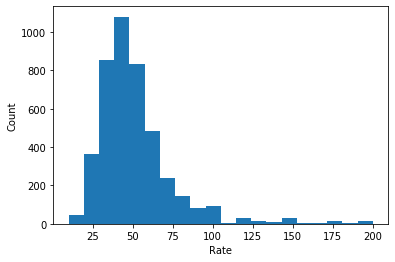

In [7]:
plt.hist(df.rate, bins=20, range=(10,200))
plt.xlabel('Rate')
plt.ylabel('Count')
plt.show()

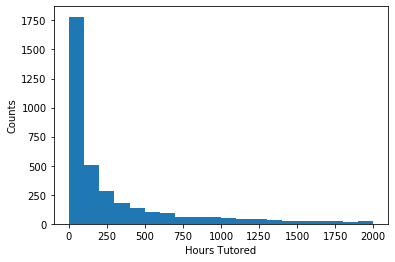

In [9]:
plt.hist(df.hours_tutor, bins=20, range=(0,2000))
plt.xlabel('Hours Tutored')
plt.ylabel('Counts')
plt.show()

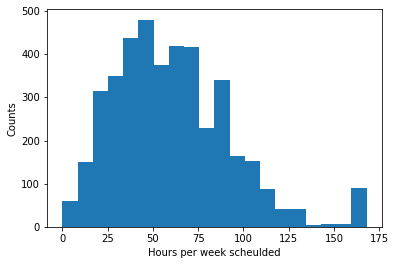

In [11]:
plt.hist(df.hours_per_week_schedule, bins=20)
plt.xlabel('Hours per week scheulded')
plt.ylabel('Counts')
plt.show()

In [162]:
#dict_of_subjects = dict()
#for i in df_eng['subjects_all']:
#    x = i.replace('[', '').replace(']', '').split(',')
#    for item in x:
#        if (item in dict_of_subjects): 
#            dict_of_subjects[item] += 1
#        else: 
#            dict_of_subjects[item] = 1
#dict_of_subjects = sorted(dict_of_subjects.items(), key=lambda x: x[1], reverse=True)

In [265]:
def string_to_list(i):
    x = i.replace('[', '').replace(']', '').replace('\'', '').split(',')
    list_i = list()
    for j in x:
        list_i.append(j.lstrip().rstrip())
    return list_i

subjects_all_list = []
for i in df_eng['subjects_all']:
    subjects_all_list.append(string_to_list(i))
df_eng['subjects_list'] = np.array(subjects_all_list)

subjects_emph_list = []
for i in df_eng['subjects_emph']:
    subjects_emph_list.append(string_to_list(i))
df_eng['subjects_emph_list'] = np.array(subjects_emph_list)

edu_list = []
for i in df_eng['edu']:
    edu_list.append(string_to_list(i))
df_eng['edu_list'] = np.array(edu_list)

df_eng.drop(columns=['subjects_all','subjects_emph', 'edu'])

,descriptions,hours_tutor,rate,bio,num_ratings,hours_sun,hours_mon,hours_tues,hours_wed,hours_thurs,hours_fri,hours_sat,hours_per_week_schedule,start_date,diff_weeks,hours_per_week_tutor,subjects_list,subjects_emph_list,edu_list
0,Experienced High School and Middle School Math...,352.0,60.0,Hello I'm Nathan! I graduated cum laude with a...,85.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,84.0,9/12/2018,89.0,3.955056,[],"[MATLAB, Biology, Linear Algebra, Algebra 1, C...","[University of Maryland, College Park Aerospac..."
1,"MIT Graduate; Mechanical Engineer; Physics, Ma...",173.0,120.0,- About Me -I graduated from MIT in 2011 with ...,45.0,12.0,5.0,5.0,5.0,5.0,5.0,12.0,49.0,10/8/2013,347.0,0.498559,"[ACT Science, PSAT, Algebra 1, Geometry, Trigo...",[Physics],[MIT Mechanical Engineer]
2,HS/College Math and Science Tutor,249.0,40.0,I have 8+ years of experience tutoring high sc...,113.0,2.0,3.0,6.0,6.0,6.0,12.0,5.0,40.0,NaN,NaN,NaN,"[ACT Science, Biology, GED, Algebra 1, Geometr...","[Biochemistry, Statistics, SAS, Probability]","[Lewis University Biology, Chemistry, Emory Un..."
3,Need help with anything Math or Science? I'm y...,1008.0,75.0,"I was born and raised in Los Angeles, CA and g...",274.0,9.0,2.0,2.0,2.0,2.0,2.0,8.0,27.0,3/10/2016,220.0,4.581818,"[ACT Science, Algebra 1, Geometry, Chemistry, ...","[Linear Algebra, Poker, SAT Math, Tennis, ISEE...","[University of Hawaii at Manoa Meteorology, Mi..."
4,Patient Engineering Graduate Knowledgeable in ...,7.0,35.0,I'm Robert! I graduated from the University of...,3.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,20.0,2/26/2020,13.0,0.538462,"[Algebra 1, Geometry, Chemistry, Precalculus, ...",[Mechanical Engineering],[University of Toledo Engineering]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,Looking to tutor students who desire to improve.,62.0,30.0,I am a recent graduate of Maranatha Baptist Un...,10.0,4.0,3.0,1.0,1.0,5.0,4.0,10.0,28.0,NaN,NaN,NaN,"[Probability, Geometry, Prealgebra, Algebra 2]",[Algebra 1],[Maranatha Baptist University Math Education]
5328,Justin K. Mathematic Teacher/Tutor,43.0,50.0,I have been a high school mathematics teacher ...,18.0,12.0,3.0,5.0,5.0,5.0,5.0,12.0,47.0,NaN,NaN,NaN,[],"[Algebra 1, Geometry, ACT Math, Algebra 2, Tri...","[Illinois State University Mathematics Ed, Gov..."
5329,Experienced and knowledgebale Math Tutor,7.0,100.0,"Hi, I am Gene. I am very dedicated and passion...",2.0,10.0,11.0,11.0,11.0,11.0,10.0,10.0,74.0,5/29/2017,157.0,0.044586,"[Elementary Math, Prealgebra]","[Linear Algebra, Algebra 1, Geometry, Precalcu...",[Gubkin Russian State University of Oil and Ga...
5330,A professional tutor helping you exceed,NaN,40.0,I have a track record of teaching and educatio...,NaN,8.0,2.0,2.0,2.0,2.0,2.0,0.0,18.0,NaN,NaN,NaN,"[Algebra 1, Elementary Math, Prealgebra, Micro...",[],[Grantham University Business Adminstration]


In [355]:
# engineer subjects categories

size_subjects = len(df_eng['subjects_list'].explode().value_counts().index)
popular_subjects = list(df_eng['subjects_list'].explode().value_counts().index[:size_subjects//3])
mid_subjects = list(df_eng['subjects_list'].explode().value_counts().index[size_subjects//3:(size_subjects//3 + size_subjects//3)])
unpopular_subjects = list(df_eng['subjects_list'].explode().value_counts().index[(size_subjects//3 + size_subjects//3):])

unwanted = ''
if unwanted in popular_subjects:
    popular_subjects.remove(unwanted)
elif unwanted in mid_subjects:
    mid_subjects.remove(unwanted)
elif unwanted in unpopular_subjects:
    unpopular_subjects.remove(unwanted)

popular_list = []
mid_list = []
unpopular_list = []
for f in df_eng['subjects_list']:
    num_popular = 0
    num_mid = 0
    num_unpopular = 0
    for j in f:
        if j in popular_subjects:
            num_popular += 1
        elif j in mid_subjects:
            num_mid += 1
        elif j in unpopular_subjects:
            num_unpopular += 1
    popular_list.append(num_popular)
    mid_list.append(num_mid)
    unpopular_list.append(num_unpopular)
df_eng['num_popular_subjects'] = np.array(popular_list)
df_eng['num_mid_subjects'] = np.array(mid_list)
df_eng['num_unpopular_subjects'] = np.array(unpopular_list)

In [356]:
df_eng

,descriptions,hours_tutor,rate,bio,num_ratings,subjects_emph,subjects_all,edu,hours_sun,hours_mon,...,subjects_list,subjects_emph_list,edu_list,num_popular,mid_list,unpopular_list,popular_list,num_popular_subjects,num_mid_subjects,num_unpopular_subjects
0,Experienced High School and Middle School Math...,352.0,60.0,Hello I'm Nathan! I graduated cum laude with a...,85.0,"['MATLAB', 'Biology', 'Linear Algebra', 'Algeb...",[],"['University of Maryland, College Park Aerospa...",12.0,12.0,...,[],"[MATLAB, Biology, Linear Algebra, Algebra 1, C...","[University of Maryland, College Park Aerospac...",1,0,0,1,0,0,0
1,"MIT Graduate; Mechanical Engineer; Physics, Ma...",173.0,120.0,- About Me -I graduated from MIT in 2011 with ...,45.0,['Physics'],"['ACT Science', 'PSAT', 'Algebra 1', 'Geometry...",['MIT Mechanical Engineer'],12.0,5.0,...,"[ACT Science, PSAT, Algebra 1, Geometry, Trigo...",[Physics],[MIT Mechanical Engineer],12,1,0,12,12,1,0
2,HS/College Math and Science Tutor,249.0,40.0,I have 8+ years of experience tutoring high sc...,113.0,"['Biochemistry', 'Statistics', 'SAS', 'Probabi...","['ACT Science', 'Biology', 'GED', 'Algebra 1',...","['Lewis University Biology, Chemistry', 'Emory...",2.0,3.0,...,"[ACT Science, Biology, GED, Algebra 1, Geometr...","[Biochemistry, Statistics, SAS, Probability]","[Lewis University Biology, Chemistry, Emory Un...",12,0,0,12,12,0,0
3,Need help with anything Math or Science? I'm y...,1008.0,75.0,"I was born and raised in Los Angeles, CA and g...",274.0,"['Linear Algebra', 'Poker', 'SAT Math', 'Tenni...","['ACT Science', 'Algebra 1', 'Geometry', 'Chem...","['University of Hawaii at Manoa Meteorology', ...",9.0,2.0,...,"[ACT Science, Algebra 1, Geometry, Chemistry, ...","[Linear Algebra, Poker, SAT Math, Tennis, ISEE...","[University of Hawaii at Manoa Meteorology, Mi...",13,0,0,13,13,0,0
4,Patient Engineering Graduate Knowledgeable in ...,7.0,35.0,I'm Robert! I graduated from the University of...,3.0,['Mechanical Engineering'],"['Algebra 1', 'Geometry', 'Chemistry', 'Precal...",['University of Toledo Engineering'],4.0,4.0,...,"[Algebra 1, Geometry, Chemistry, Precalculus, ...",[Mechanical Engineering],[University of Toledo Engineering],8,0,0,8,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,Looking to tutor students who desire to improve.,62.0,30.0,I am a recent graduate of Maranatha Baptist Un...,10.0,['Algebra 1'],"['Probability', 'Geometry', 'Prealgebra', 'Alg...",['Maranatha Baptist University Math Education'],4.0,3.0,...,"[Probability, Geometry, Prealgebra, Algebra 2]",[Algebra 1],[Maranatha Baptist University Math Education],4,0,0,4,4,0,0
5328,Justin K. Mathematic Teacher/Tutor,43.0,50.0,I have been a high school mathematics teacher ...,18.0,"['Algebra 1', 'Geometry', 'ACT Math', 'Algebra...",[],"['Illinois State University Mathematics Ed', '...",12.0,3.0,...,[],"[Algebra 1, Geometry, ACT Math, Algebra 2, Tri...","[Illinois State University Mathematics Ed, Gov...",1,0,0,1,0,0,0
5329,Experienced and knowledgebale Math Tutor,7.0,100.0,"Hi, I am Gene. I am very dedicated and passion...",2.0,"['Linear Algebra', 'Algebra 1', 'Geometry', 'P...","['Elementary Math', 'Prealgebra']",['Gubkin Russian State University of Oil and G...,10.0,11.0,...,"[Elementary Math, Prealgebra]","[Linear Algebra, Algebra 1, Geometry, Precalcu...",[Gubkin Russian State University of Oil and Ga...,2,0,0,2,2,0,0
5330,A professional tutor helping you exceed,NaN,40.0,I have a track record of teaching and educatio...,NaN,[],"['Algebra 1', 'Elementary Math', 'Prealgebra',...",['Grantham University Business Adminstration'],8.0,2.0,...,"[Algebra 1, Elementary Math, Prealgebra, Micro...",[],[Grantham University Business Adminstration],4,0,0,4,4,0,0


In [287]:
# engineer edu categories
for i in df_eng['edu']:
    if 'PhD' in i:
        print(i)

['Biola College Humanities', 'CSUB Anthropology Masters', 'UCSB Cultural Perspectives in Education PhD']
['College of Electrical & Mechanical Engineering Electrical Engg', 'College of Electrical & Mechanical Engineering Masters', 'National University of Sciences & Technology PhD']
['Princeton Univeristy Chemical Engineering', 'University of Wisconsin - Madison PhD', 'Electrical Engineering / Physics / Nuclear Engineering Masters']
['Poly. Inst. Bucharest Electrical Eng.', 'Poly. Inst. Bucharest Masters', 'SUNY at Buffalo PhD']
['The University of Texas at Arlington Physics', 'The University of Texas at Arlington Masters', 'The University of Texas at Arlington PhD']
['Gubkin Russian State University of Oil and Gas Applied mathematics', 'University of Rhode Island PhD']
['UCLA Neuroscience', 'University of Minnesota MD', '(1964) University of Minnesota-Twin Cities PhD']
['Tsinghua University, Beijing China Physics', 'University of Rochester PhD']
['Cornell University undergrad', 'The Uni